* ### **Inicializando Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report, confusion_matrix
import scipy.stats as stats 
from scipy.stats import mannwhitneyu, ttest_ind


np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

print("uploading")
urls = pd.read_csv('/Users/Brenda/Documents/[TCC] Aprendizado de Maquina/url/train_dataset.csv')
print("uploaded")
urls.head()

##############
##############  Label: 0 benign / 1 malicious
##############

uploading
uploaded


,url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,url_entropy,url_hamming_1,url_hamming_00,url_hamming_10,url_hamming_01,url_hamming_11,url_2bentropy,url_3bentropy,url_count_dot,url_count_https,url_count_http,url_count_perc,url_count_hyphen,url_count_www,url_count_atrate,...,url_nunique_chars_ratio,path_len,path_count_no_of_dir,path_count_no_of_embed,path_count_zero,path_count_pertwent,path_has_any_sensitive_words,path_count_lower,path_count_upper,path_count_nonascii,path_has_singlechardir,path_has_upperdir,query_len,query_count_components,pdomain_len,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
0,irs-profilepaymentservice.com/home,1,phishtank,0,0,0,0,0,0,34,4.01013,0.54044,0.10662,0.20588,0.28676,0.19485,1.79028,2.36098,1,0,0,0,1,0,0,...,0.55882,4,1,0,0,0,0,31,0,0,0,0,0,0,0,0,0,0,0,3,com,0,17,0,0
1,cpuggsukabumi.id,0,majestic_million,0,0,0,0,0,0,16,3.45282,0.53125,0.10938,0.20312,0.29688,0.17188,1.77310,2.35995,1,0,0,0,0,0,0,...,0.75000,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,2,id,1,10,0,0
2,members.tripod.com/~don_rc/ring.htm,0,data_clean_test_mendel,0,0,0,0,0,0,35,4.00043,0.55357,0.09643,0.20714,0.27143,0.20000,1.77091,2.36183,3,0,0,0,0,0,0,...,0.51429,7,2,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,3,com,0,2,7,0
3,optuswebmailadminprovider.weebly.com/,1,phishtank,0,0,0,1,0,0,37,4.17527,0.53716,0.10811,0.20608,0.28041,0.18919,1.78540,2.36458,2,0,0,0,0,0,0,...,0.54054,0,1,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,3,com,0,3,25,0
4,topoz.com.pl,0,dmoz_harvard,0,0,0,0,0,0,12,2.85539,0.56250,0.09375,0.18750,0.23958,0.22917,1.75396,2.24352,2,0,0,0,0,0,0,...,0.66667,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,6,com.pl,0,3,0,0


* ### **Tratando dados**

In [2]:
del urls["url_entropy"]
del urls["url_hamming_1"]
del urls["url_hamming_00"]
del urls["url_hamming_10"]
del urls["url_hamming_01"]
del urls["url_hamming_11"]
del urls["url_2bentropy"]
del urls["url_3bentropy"]

In [3]:
################################################
###Tratamento de valores omissos caso houver###
###############################################

print("Valores Nulos")
print(urls.isnull().sum())

arr = ['label','url_has_login','url_has_client','url_has_server','url_has_admin',

       'url_has_ip','url_isshorted','url_len','url_count_dot','url_count_https',

       'url_count_http','url_count_perc','url_count_hyphen','url_count_www','url_count_atrate',

       'url_count_hash','url_count_semicolon','url_count_underscore','url_count_ques','url_count_equal',

       'url_count_amp','url_count_letter','url_count_digit','url_count_sensitive_financial_words',

       'url_count_sensitive_words','url_nunique_chars_ratio','path_len','path_count_no_of_dir',

       'path_count_no_of_embed','path_count_zero','path_count_pertwent','path_has_any_sensitive_words',

       'path_count_lower','path_count_upper','path_count_nonascii','path_has_singlechardir','path_has_upperdir',

       'query_len','query_count_components','pdomain_len','pdomain_count_hyphen','pdomain_count_atrate',

       'pdomain_count_non_alphanum','pdomain_count_digit','tld_len','tld_is_sus','pdomain_min_distance',

       'subdomain_len','subdomain_count_dot']


## Corrigir erros de tipo (string, int, float) para NaN

for c in urls[arr].columns:

    urls[c] = pd.to_numeric(urls[c], errors='coerce')


## Excluir linhas que contenham NaN

urls = urls.dropna(axis=0).reset_index(drop=True)

print("\nDimensões:\n{0}\n".format(urls.shape))



Valores Nulos
url                     0
label                   0
source                  0
url_has_login           0
url_has_client          0
                       ..
tld                     0
tld_is_sus              0
pdomain_min_distance    0
subdomain_len           0
subdomain_count_dot     0
Length: 52, dtype: int64

Dimensões:
(6728848, 52)



In [ ]:
#tratamento outlier ou valores nulos #1
#def dp_outlier(arr, col):
#    return (6 * np.std(arr)[col]) + (np.mean(arr)[col]) 
#index = np.where(urls["url_len"] > dp_outlier(urls, "url_len"))
#def remove_outliers(df, column, threshold=3):
#  z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
#  df = df[z_scores < threshold]
#  return df

#tratamento de outlier ou valores nulos #2
#mediana = np.median([el for el in urls["url_count_hyphen"] if (np.isnan(el) == False)])
#new_age = np.where(urls["url_count_hyphen"].isnull(),mediana,urls["url_count_hyphen"])          
#urls["url_count_hyphen"] = new_age
#print("\nAnálise do novo atributo url_count_hyphen:")
#print(urls["url_count_hyphen"].describe())

* ### **Estatisticas**

In [4]:
## Estatisticas basicas de todas as colunas
print(urls.describe())

              label  url_has_login  url_has_client  url_has_server  \
count 6728848.00000  6728848.00000   6728848.00000   6728848.00000   
mean        0.21485        0.01563         0.00200         0.00224   
std         0.41072        0.12404         0.04469         0.04730   
min         0.00000        0.00000         0.00000         0.00000   
25%         0.00000        0.00000         0.00000         0.00000   
50%         0.00000        0.00000         0.00000         0.00000   
75%         0.00000        0.00000         0.00000         0.00000   
max         1.00000        1.00000         1.00000         1.00000   

       url_has_admin    url_has_ip  url_isshorted       url_len  \
count  6728848.00000 6728848.00000  6728848.00000 6728848.00000   
mean         0.00365       0.00362        0.05041      23.75615   
std          0.06030       0.06005        0.21880      33.37858   
min          0.00000       0.00000        0.00000       2.00000   
25%          0.00000       0.00000

In [5]:
## Matriz de correlacao de todas colunas de int
int_fields = urls.dtypes[urls.dtypes == "int64"].index
corr = np.corrcoef(urls[int_fields].transpose())
correlacao = pd.DataFrame(data=corr, index=int_fields, columns=int_fields)
print("\nMatriz de correlação dos atributos inteiros:\n{0}".format(correlacao))


Matriz de correlação dos atributos inteiros:
                                       label  url_has_login  url_has_client  \
label                                1.00000        0.23881         0.07943   
url_has_login                        0.23881        1.00000         0.04974   
url_has_client                       0.07943        0.04974         1.00000   
url_has_server                       0.03114        0.00950         0.00420   
url_has_admin                        0.10204        0.05538         0.02999   
url_has_ip                           0.11522        0.05300         0.00345   
url_isshorted                        0.04562        0.02274         0.00021   
url_len                              0.32476        0.27332         0.11282   
url_count_dot                        0.34635        0.21349         0.06020   
url_count_https                      0.06695        0.06948         0.05813   
url_count_http                       0.06350        0.05289         0.03897   
url_co

* ### **Estatisticas em gráficos**

**1. Grafico de comparacao de quais caracteres especiais influenciam se é suspeito**

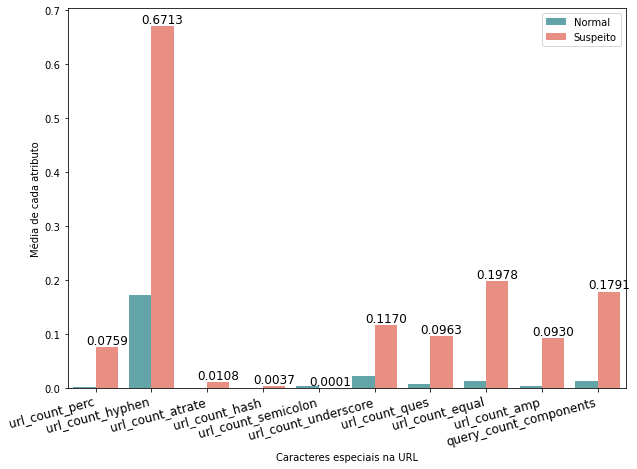

In [44]:
view_1_array = ['label','url_count_perc','url_count_hyphen','url_count_atrate',
       'url_count_hash','url_count_semicolon','url_count_underscore','url_count_ques','url_count_equal',
       'url_count_amp','query_count_components']

mean_has_urls = urls[view_1_array].groupby('label').mean()
urls_mean_barplot = mean_has_urls.T.stack().reset_index().rename(columns={'level_0': 'Caracteres especiais na URL',
                                                                          0: 'Média de cada atributo'})
cols = ['#56aeb3' if (y == 0) else 'salmon' for y in urls_mean_barplot['label']]
plt.figure(figsize=(10, 7))
g = sns.barplot(x=urls_mean_barplot['Caracteres especiais na URL'], 
                    y=urls_mean_barplot['Média de cada atributo'], 
                    hue=urls_mean_barplot['label'], palette=cols)
g.bar_label(g.containers[1],  fmt='%.4f', fontsize=12)
legend_handles, _= g.get_legend_handles_labels()
g.legend(legend_handles, ['Normal','Suspeito'])
g.set_xticklabels(g.get_xticklabels(), rotation=15, fontsize=12, horizontalalignment='right')
#g.set_title('Comparaçoes')

plt.savefig("view_1.png")

**2. Coluna source**

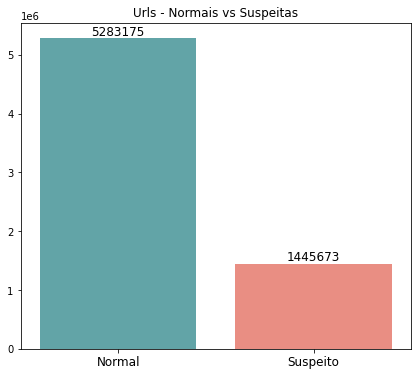

In [45]:
value_counts = urls['label'].value_counts()
cols = ['#56aeb3' if (x == 0) else 'salmon' for x in value_counts.index]
plt.figure(figsize=(7, 6))
g = sns.barplot(x=value_counts.index, y=value_counts.values, palette=cols)
g.bar_label(g.containers[0],  fmt='%.0f', fontsize=12)
g.set_xticklabels(['Normal', 'Suspeito'], fontsize=12)
g.set_title('Urls - Normais vs Suspeitas')
# save the plot as PNG file
plt.savefig("view_2.png")

**3. Comparacao das extensoes que mais aparecem**

In [84]:
#Quantos tipos diferentes de estensoes existem?
vc_tld = len(urls['tld'].value_counts())
print("Quantidade de extensoes diferentes no dataset {0}".format(vc_tld))

Quantidade de extensoes diferentes no dataset 4251


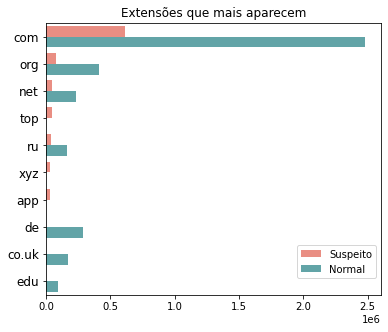

In [91]:
# Pega os 7 mais de cada label
top_tlds_tipo0 = urls[urls['label'] == 0]['tld'].value_counts().head(7).reset_index()
top_tlds_tipo0 = top_tlds_tipo0.assign(label='Normal')
top_tlds_tipo1 = urls[urls['label'] == 1]['tld'].value_counts().head(7).reset_index()
top_tlds_tipo1 = top_tlds_tipo1.assign(label='Suspeito')
result = pd.concat([top_tlds_tipo1, top_tlds_tipo0]).reset_index()
del result["level_0"]

# Create a barplot for tipo=0
plt.figure(figsize=(6, 5))
f = sns.barplot(y='index', x='tld', data=result, hue='label', palette={'Normal': '#56aeb3', 'Suspeito': 'salmon'})
f.set_yticklabels(f.get_yticklabels(), fontsize=12, horizontalalignment='right')

legend_handles, _= f.get_legend_handles_labels()
f.legend(legend_handles, ['Suspeito','Normal'], bbox_to_anchor=(1,0.2))

plt.xlabel('')
plt.ylabel('')
f.set_title('Extensões que mais aparecem')

plt.savefig("view_3.png")

**4. Boxplot para identificar outliers**

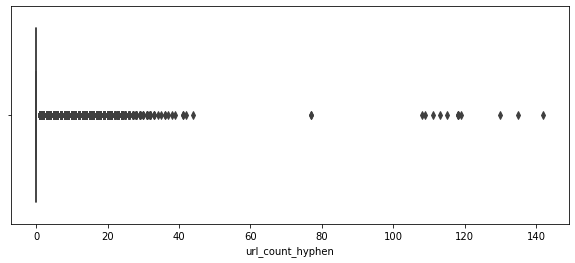

In [92]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=urls, x="url_count_hyphen")
plt.savefig("view_4.png")
index = np.where(urls["url_count_hyphen"] == max(urls["url_count_hyphen"]) )

* ### **Preparar base para treinamento**

In [ ]:
#REMOVE COLUNAS STRING
del urls["url"]
del urls["source"]
del urls["tld"]

#######################################
#INICIAR BALANCEAMENTO DE CLASSE LABEL#
#######################################
#CONTAR AS CLASSIFICACOES
count_class_0, count_class_1 = urls.label.value_counts()

#DIVIDE O DATA FRAME POR CLASSIFICACAO
df_class_0 = urls[urls['label'] == 0]
df_class_1 = urls[urls['label'] == 1]

#UNDERSAMPLING ALEATORIO
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Nova quantidade:')
print(df_test_under.label.value_counts())

#######################################
#DIVIDE A BASE EM TESTE E TREINAMENTO
#######################################
labels = df_test_under.columns[2:]

X = df_test_under[labels]
y = df_test_under['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

atributos = list(urls)[1:(urls.shape[1])]
rotulo = list(urls)[(urls.shape[1] - 49)]


* ### **Treinamentos de aprendizado de máquina e testes**

**1. XGBoost**

In [ ]:
model = XGBClassifier(enable_categorical=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Acurácia da base de treinamento: {:.4f}".format(model.score(X_train, y_train)))
print("Acurácia da base de testes: {:.4f}".format(model.score(X_test, y_test)))

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precisao:", precision)
print("Recall:", recall)
print("F1-score:", f1)


In [ ]:
#MATRIZ DE CONFUSAO
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Matriz de confusão:\n', conf_mat)

labels = ['Label 0', 'Label 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.GnBu)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center')
        
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
#plt.xlabel('Predito')
#plt.ylabel('Esperado')
plt.savefig("matriz_1.png")
plt.show()

**2. DecisionTree**

In [ ]:
model_tree = DecisionTreeClassifier(random_state=0, criterion='gini', min_samples_leaf=4)
model_tree = model_tree.fit(X_train, y_train)

print("Acurácia (base de treinamento):", model_tree.score(X_train, y_train))

y_pred = model_tree.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["ye", "No"]))
      
#params = {'min_impurity_decrease':[0.01], 'min_samples_leaf':[1,4]}
#model_grid = GridSearchCV(model_tree, param_grid=params)
#y_pred = model_grid.fit(X_train, y_train).predict(X_test)
#print(model_grid.best_params_,'\n')

**3. Naive Bayes**

In [ ]:
model_gnb = GaussianNB()
model_gnb = model_gnb.fit(X_train, y_train)

y_pred = model_gnb.predict(X_test)

print("Número de erros de classificação {0} de {1}".format((y_test != y_pred).sum(), urls.shape[0]))

ac = model_gnb.score(X_test, y_test)

print("\nAcurácia do modelo: {0:.2f}%\n".format(100*ac))
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred, target_names=["ye", "No"]))
#cnf_matrix = confusion_matrix(y_test, y_pred)
#cnf_table = pd.DataFrame(data=cnf_matrix, index=["ye", "No"], columns=[x + "(prev)" for x in ["ye", "No"]])
#print(cnf_table)